In [11]:
import numpy as np
import einops
import matplotlib.pyplot as plt
import seaborn
import cv2
import visualization_utils
import torch
import pickle
import json
import plotly.express as px

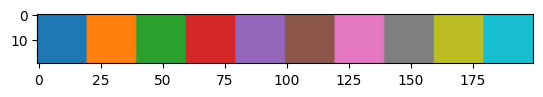

In [12]:
from visualization_utils.color import COLOR_PALETTE
v = einops.repeat(np.array(COLOR_PALETTE), '(n1 n2) c -> (n1 h) (n2 w) c', h=20, w=20, n1=1)
plt.imshow(v)

In [13]:
skeletons = json.load(open(f'C:/Users/ivand/Desktop/output_temp/default_sc1/skeletons.json','r'))
data = pickle.load(open(f'C:/Users/ivand/Desktop/output_temp/default_sc1/tempdata.pickle', 'rb'))
image = cv2.imread(f'C:/Users/ivand/Desktop/output_temp/default_sc1/Camera.001_0001.png')

data = data[0]

In [14]:
from visualization_utils.visualization import skeleton_map_to_edges, draw_on_image

excluded_bones = ['Bone.012.R.001', 'Bone.012.L.001', 'Bone.008.R.001', 'Bone.008.L.001', 'Bone.020']
edges = skeleton_map_to_edges(skeletons['Armature'], excluded_bones)

In [15]:
sk = np.array([d['sk'] for d in data.values()])

In [16]:
image = draw_on_image(image, skeletons=sk, edges=edges)
px.imshow(image)